<a href="https://colab.research.google.com/github/Wickramasingh/Research-MA_Project/blob/main/youtube_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import Libraries

In [278]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

2.Data Loading

In [151]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [279]:
file_path = 'Top Youtubers Dataset.csv'
df = pd.read_csv(file_path, encoding='latin1')

df.head()

,Rank,Youtuber,Subscribers,Video Views,Video Count,Category,Started
0,1,MrBeast,284000000,5.240290e+10,803,Entertainment,2012
1,2,T-Series,268000000,2.586240e+11,21237,Music,2006
2,3,YouTube Movies,181000000,0.000000e+00,0,Film & Animation,2015
3,4,Cocomelon - Nursery Rhymes,177000000,1.828810e+11,1188,Education,2006
4,5,SET India,174000000,1.653950e+11,139720,Shows,2006


3.Data Cleaning and Preprocessing

In [280]:
# Remove any duplicate rows
df = df.drop_duplicates()
# Remove rows missing values
df = df.dropna(subset=['Category', 'Subscribers', 'Video Views', 'Video Count', 'Started'])
# Convert 'Started' column to numeric if it's not already
df['Started'] = pd.to_numeric(df['Started'], errors='coerce')
# Drop rows where 'Started' could not be converted to numeric
df = df.dropna(subset=['Started'])
# Ensure 'Subscribers' is numeric
df['Subscribers'] = pd.to_numeric(df['Subscribers'], errors='coerce')
# Drop rows where 'Subscribers' could not be converted to numeric
df = df.dropna(subset=['Subscribers'])
# Drop rows where 'Video Views' or 'Video Count' are not numeric or have missing values
df['Video Views'] = pd.to_numeric(df['Video Views'], errors='coerce')
df['Video Count'] = pd.to_numeric(df['Video Count'], errors='coerce')
df = df.dropna(subset=['Video Views', 'Video Count'])
df = df[(df['Subscribers'] != 0) & (df['Video Views'] != 0) & (df['Video Count'] != 0)]

df.head()


,Rank,Youtuber,Subscribers,Video Views,Video Count,Category,Started
0,1,MrBeast,284000000,5.240290e+10,803,Entertainment,2012
1,2,T-Series,268000000,2.586240e+11,21237,Music,2006
3,4,Cocomelon - Nursery Rhymes,177000000,1.828810e+11,1188,Education,2006
4,5,SET India,174000000,1.653950e+11,139720,Shows,2006
5,6,? Kids Diana Show,123000000,1.039730e+11,1230,People & Blogs,2015


Linear Regression model

In [268]:
X = df[['Video Views', 'Video Count','Started', 'Category']]
y = df['Subscribers']

4.Model Training

In [269]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Category'])
    ],
    remainder='passthrough'
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5.Model Evaluation

In [270]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Linear Regression model - Mean Absolute Error: {mae}")
print(f"Linear Regression model - R-squared: {r2}")
print(f"Linear Regression model - Root Mean Squared Error (RMSE): {rmse}")

Linear Regression model - Mean Absolute Error: 6112739.026828133
Linear Regression model - R-squared: 0.4337485563575084
Linear Regression model - Root Mean Squared Error (RMSE): 8240290.096337918


6.Visualization

In [254]:
X_test_with_names = X_test.copy()
X_test_with_names['Youtuber'] = df.loc[X_test.index, 'Youtuber']
X_test_with_names['Category'] = df.loc[X_test.index, 'Category']

comparison_df = pd.DataFrame({
    'Channel Name': X_test_with_names['Youtuber'],
    'Category': X_test_with_names['Category'],
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred
})
comparison_df.head(10)
plot_df = pd.DataFrame({
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred,
    'Category': X_test_with_names['Category']
})
comparison_df.head(10)

,Channel Name,Category,Actual Subscribers,Predicted Subscribers
359,Amit Bhadana,Entertainment,24400000,1.597022e+07
905,Airrack,Entertainment,15200000,1.643727e+07
548,GRAMMY GOLD OFFICIAL,Music,19800000,3.475896e+07
571,AMARINTV : ????????????,Entertainment,19400000,1.994734e+07
717,CRAZY GREAPA,Entertainment,17100000,2.690707e+07
142,BabyBus - Kids Songs and Cartoons,Education,36800000,4.111168e+07
222,Karla Bustillos,Entertainment,31200000,2.127702e+07
176,Dangal TV Channel,Entertainment,34100000,3.590365e+07
91,Like Nastya Show,Entertainment,43300000,3.317652e+07
294,Smosh,Comedy,26600000,2.392500e+07


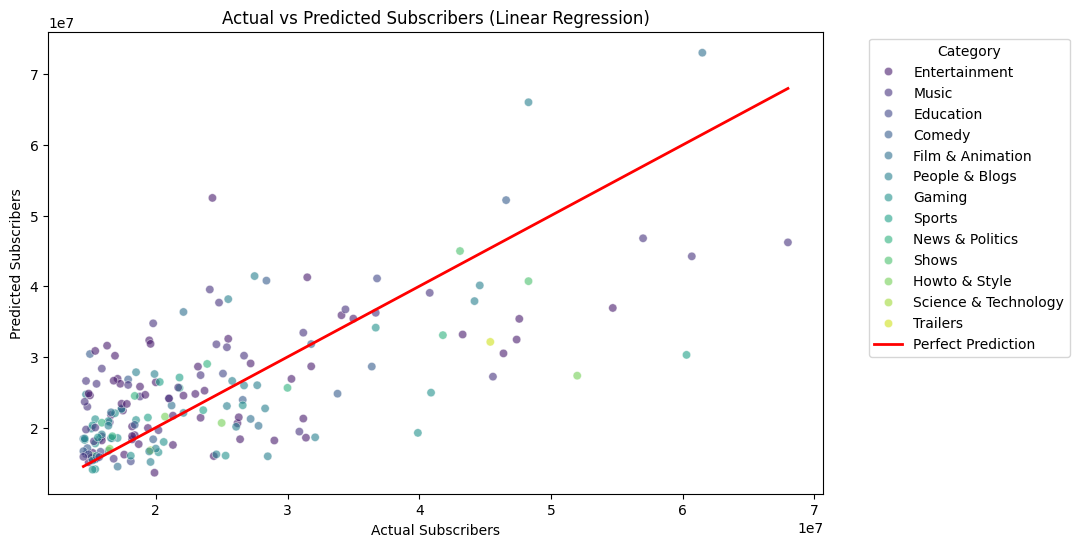

In [255]:
X_test_with_names = X_test.copy()
X_test_with_names['Youtuber'] = df.loc[X_test.index, 'Youtuber']
X_test_with_names['Category'] = df.loc[X_test.index, 'Category']

comparison_df = pd.DataFrame({
    'Channel Name': X_test_with_names['Youtuber'],
    'Category': X_test_with_names['Category'],
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred
})
comparison_df.head(10)
plot_df = pd.DataFrame({
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred,
    'Category': X_test_with_names['Category']
})

#scatter plot with color-coded categories
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Subscribers', y='Predicted Subscribers', hue='Category', data=plot_df, alpha=0.6, palette='viridis')

#prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')

plt.title('Actual vs Predicted Subscribers (Linear Regression)', fontsize=12)
plt.xlabel('Actual Subscribers', fontsize=10)
plt.ylabel('Predicted Subscribers', fontsize=10)

plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Linear Regression R-squared Comparison with Existing Works

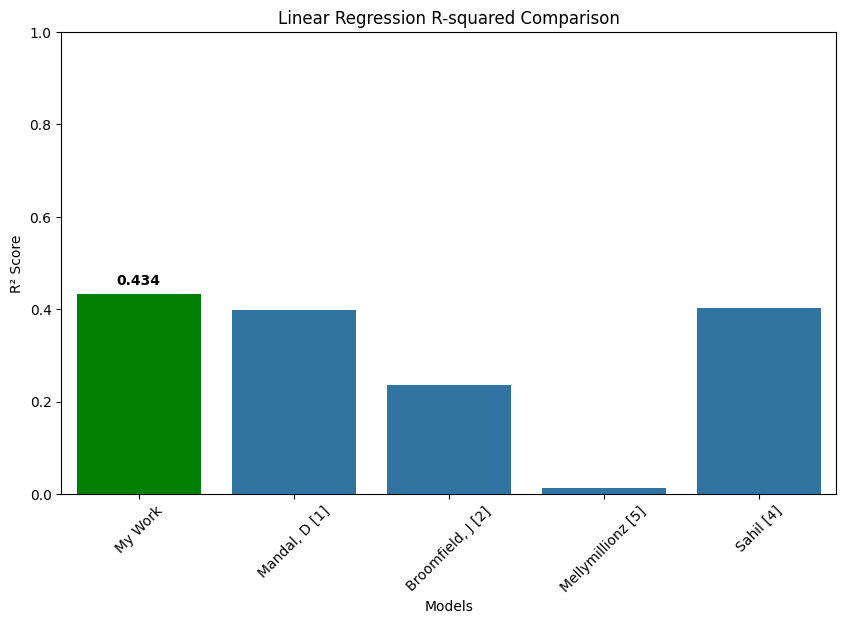

In [256]:
# Calculate R² score for my model
r2 = r2_score(y_test, y_pred)

# Existing R² scores from research papers
r2_existing_works = [
    0.399,  # Mandal, D
    0.236,  # Broomfield, J
    0.012,  # Mellymillionz
    0.403   # Sahil
]

# Combine my R² with existing works
r2_scores = [r2] + r2_existing_works

# Model names for comparison
models = [
    'My Work',
    'Mandal, D [1]',
    'Broomfield, J [2]',
    'Mellymillionz [5]',
    'Sahil [4]'
]

# Identify the highest R² score and its index
max_r2 = max(r2_scores)
max_index = r2_scores.index(max_r2)

# Plotting R² Scores
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=models, y=r2_scores)

 # Highlight the highest bar in green
bars.patches[max_index].set_facecolor('green')
plt.text(max_index, max_r2 + 0.02, f'{max_r2:.3f}', ha='center', color='black', weight='bold')

# Titles and labels
plt.title('Linear Regression R-squared Comparison')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)

plt.show()


Random Forest model

7.Model Training

In [271]:
# model using RandomForestRegressor
random_forest_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])
# Train the new model
random_forest_model.fit(X_train, y_train)

# Predict using the new model
y_pred_rf = random_forest_model.predict(X_test)


8. Model Evaluation

In [272]:
# performance metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - Mean Absolute Error:: {mae_rf}')
print(f'Random Forest - R-squared: {r2_rf}')


Random Forest - Mean Absolute Error:: 6251114.583333333
Random Forest - R-squared: 0.30161115453058795


9. Visualization

In [259]:
X_test_with_names = X_test.copy()
X_test_with_names['Youtuber'] = df.loc[X_test.index, 'Youtuber']
X_test_with_names['Category'] = df.loc[X_test.index, 'Category']

comparison_df = pd.DataFrame({
    'Channel Name': X_test_with_names['Youtuber'],
    'Category': X_test_with_names['Category'],
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred_rf
})
comparison_df.head(10)
plot_df = pd.DataFrame({
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred_rf,
    'Category': X_test_with_names['Category']
})
comparison_df.head(10)

,Channel Name,Category,Actual Subscribers,Predicted Subscribers
359,Amit Bhadana,Entertainment,24400000,17283000.0
905,Airrack,Entertainment,15200000,19351000.0
548,GRAMMY GOLD OFFICIAL,Music,19800000,29595000.0
571,AMARINTV : ????????????,Entertainment,19400000,19361000.0
717,CRAZY GREAPA,Entertainment,17100000,25330000.0
142,BabyBus - Kids Songs and Cartoons,Education,36800000,41481000.0
222,Karla Bustillos,Entertainment,31200000,23440000.0
176,Dangal TV Channel,Entertainment,34100000,33009000.0
91,Like Nastya Show,Entertainment,43300000,36229000.0
294,Smosh,Comedy,26600000,22783000.0


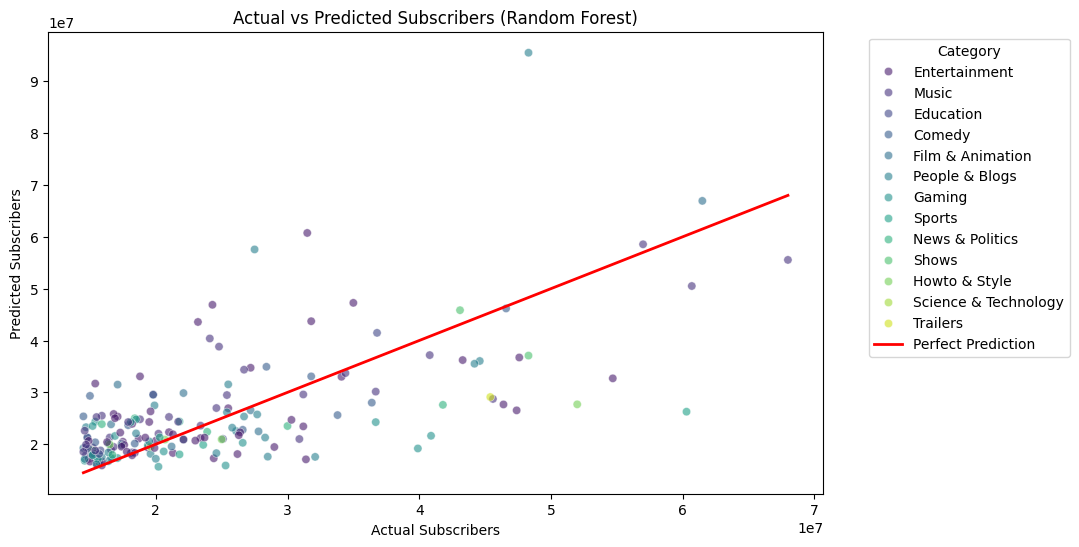

In [260]:
X_test_with_names = X_test.copy()
X_test_with_names['Youtuber'] = df.loc[X_test.index, 'Youtuber']
X_test_with_names['Category'] = df.loc[X_test.index, 'Category']

comparison_df = pd.DataFrame({
    'Channel Name': X_test_with_names['Youtuber'],
    'Category': X_test_with_names['Category'],
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred_rf
})
comparison_df.head(10)
plot_df = pd.DataFrame({
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred_rf,
    'Category': X_test_with_names['Category']
})

#scatter plot with color-coded categories
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Subscribers', y='Predicted Subscribers', hue='Category', data=plot_df, alpha=0.6, palette='viridis')

#prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')

plt.title('Actual vs Predicted Subscribers (Random Forest)', fontsize=12)
plt.xlabel('Actual Subscribers', fontsize=10)
plt.ylabel('Predicted Subscribers', fontsize=10)

plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

XGBoost Model

In [263]:
# dataframe
df['Log_Subscribers'] = np.log1p(df['Subscribers'])
df['Log_Video_Views'] = np.log1p(df['Video Views'])
df['Log_Video_Count'] = np.log1p(df['Video Count'])

# Encoding categorical feature
df['Category'] = LabelEncoder().fit_transform(df['Category'])

# Splitting the data
X = df[['Log_Video_Views', 'Log_Video_Count', 'Category', 'Started']]
y = df['Log_Subscribers']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [264]:
model = XGBRegressor()
model.fit(X_train_scaled, y_train)

#predictions
y_pred_xg = model.predict(X_test_scaled)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

# Grid Search with cross-validation
grid = GridSearchCV(XGBRegressor(), param_grid, scoring='r2', cv=5)
grid.fit(X_train_scaled, y_train)

y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred_xg)

# Calculate MAE and MSE on original scale
mae_original = mean_absolute_error(y_test_original, y_pred_original)
mse_original = mean_squared_error(y_test_original, y_pred_original)

# original scale
print(f"Mean Absolute Error: {mae_original}")
print(f"Mean Squared Error: {mse_original}")
print(f"Best R-squared: {grid.best_score_}")




Mean Absolute Error: 6395178.083333331
Mean Squared Error: 79355606635229.05
Best R-squared: 0.5169039295744934


In [281]:
X_test_with_names = X_test.copy()
X_test_with_names['Youtuber'] = df.loc[X_test.index, 'Youtuber']
X_test_with_names['Category'] = df.loc[X_test.index, 'Category']

comparison_df = pd.DataFrame({
    'Channel Name': X_test_with_names['Youtuber'],
    'Category': X_test_with_names['Category'],
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred_xg
})
comparison_df.head(10)
plot_df = pd.DataFrame({
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred_xg,
    'Category': X_test_with_names['Category']
})
comparison_df.head(10)

,Channel Name,Category,Actual Subscribers,Predicted Subscribers
359,Amit Bhadana,Entertainment,24400000,16.555500
905,Airrack,Entertainment,15200000,16.922132
548,GRAMMY GOLD OFFICIAL,Music,19800000,17.043468
571,AMARINTV : ????????????,Entertainment,19400000,16.842432
717,CRAZY GREAPA,Entertainment,17100000,16.987947
142,BabyBus - Kids Songs and Cartoons,Education,36800000,17.515245
222,Karla Bustillos,Entertainment,31200000,17.216568
176,Dangal TV Channel,Entertainment,34100000,16.874498
91,Like Nastya Show,Entertainment,43300000,17.430588
294,Smosh,Comedy,26600000,17.032869


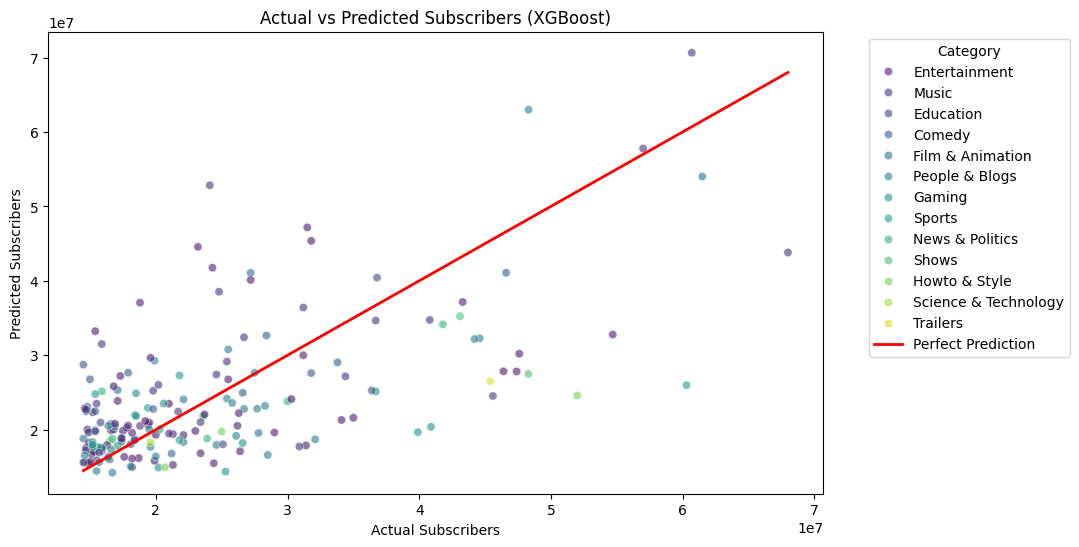

In [290]:
# Create a DataFrame to include the necessary information
X_test_with_names = X_test.copy()
X_test_with_names['Youtuber'] = df.loc[X_test.index, 'Youtuber']
X_test_with_names['Category'] = df.loc[X_test.index, 'Category']

# Comparison DataFrame for XGBoost
comparison_df_xg = pd.DataFrame({
    'Channel Name': X_test_with_names['Youtuber'],
    'Category': X_test_with_names['Category'],
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred_original
})

# Plot DataFrame for XGBoost
plot_df_xg = pd.DataFrame({
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred_original,
    'Category': X_test_with_names['Category']
})

# Scatter plot for XGBoost predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Subscribers', y='Predicted Subscribers', hue='Category', data=plot_df_xg, alpha=0.6, palette='viridis')

# Prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')

plt.title('Actual vs Predicted Subscribers (XGBoost)', fontsize=12)
plt.xlabel('Actual Subscribers', fontsize=10)
plt.ylabel('Predicted Subscribers', fontsize=10)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



10.Model Comparison - RMSE

In [275]:
models = ['Linear Regression',' Random Forest','XGBoost']
mae = [
    mean_absolute_error(y_test, y_pred),
    mean_absolute_error(y_test, y_pred_rf),
    mean_absolute_error(y_test, y_pred_xg)
]

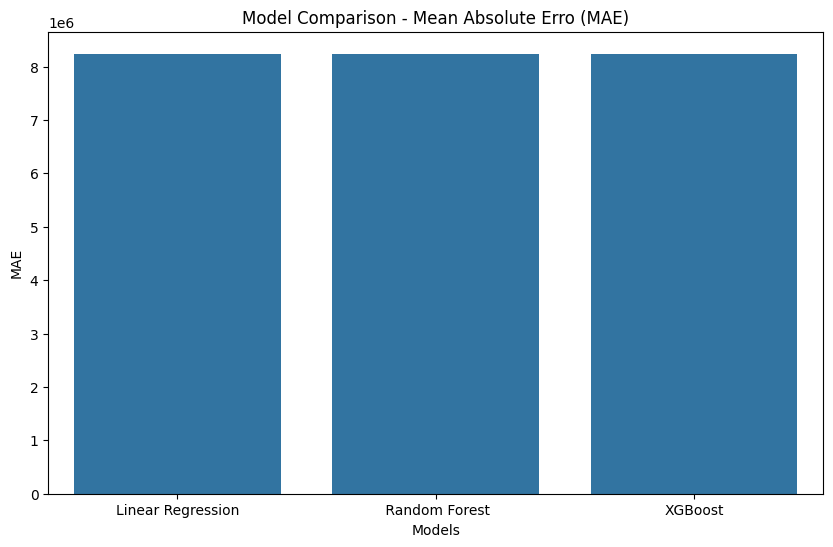

In [276]:
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=rmse)
plt.title('Model Comparison - Mean Absolute Erro (MAE)')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.show()

11.Model Comparison - R2 Score

In [273]:
models = ['Linear Regression', 'Random Forest','XGBoost']
r2 = [
    r2_score(y_test, y_pred),
    r2_score(y_test, y_pred_rf),
    grid.best_score_
]

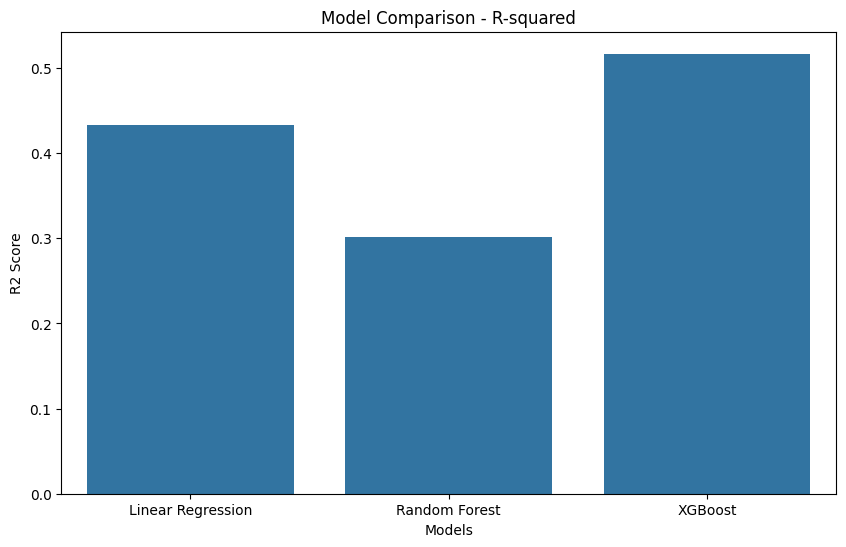

In [274]:
# Plotting R2 Score
plt.figure(figsize=(10, 6))
sns.barplot(x = models, y = r2)
plt.title('Model Comparison - R-squared')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.show()